<a href="https://colab.research.google.com/github/zomorodiyan/MAE-5093/blob/main/CP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

<h1> Problem 1<h1>

In [9]:
#@title define plot method
def plot(plotTitle, label1, label2, label3, label4, x, y1, y2, y3, y4):
    plt.figure()
    plt.plot(x, y4, '*', label=label4)
    plt.plot(x, y1, label=label1)
    plt.plot(x, y2, label=label2)
    plt.plot(x, y3, label=label3)
    plt.title(plotTitle)
    plt.xlabel('t')
    plt.ylabel('v')
    plt.legend()

In [8]:
#@title define exact, Euler, LaxWendroff, rungeKutta methods
def exactSol(x,t,a):
    return (np.sin(2*np.pi*(x-a*t)))

def Euler(u, nx, c):
    
    un = np.copy(u)
    for i in range(nx, 0, -1):
        u[i] = un[i] - c * (un[i] - un[i-1])
    u[0] = u[nx]
    return u


def LaxWendroff(u, nx, c):

    un = np.copy(u)
    i = nx
    u[i] = un[i] - 0.5 * c * (un[0] - un[i-1]) + 0.5 * (c**2) * (un[0] - 2 * un[i] + un[i-1])
    for i in range(nx-1, 0, -1):
        u[i] = un[i] - 0.5 * c * (un[i+1] - un[i-1]) + 0.5 * (c**2) * (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = u[nx]
    return u


def rungeKutta(u, nx, c):
    
    un = np.copy(u)
    u1, u2 = map(np.zeros_like, (u, u))
    
    for i in range(nx-1, -1, -1):
        u1[i] = un[i] - 0.5 * c * (un[i+1] - un[i-1])
    i = nx
    u1[i] = un[i] - 0.5 * c * (un[0] - un[i-1])

    for i in range(nx-1, -1, -1):        
        u2[i] = 0.75 * un[i] + 0.25 * u1[i] - 0.125 * c * (u1[i+1] - u1[i-1])
    i = nx
    u2[i] = 0.75 * un[i] + 0.25 * u1[i] - 0.125 * c * (u1[0] - u1[i-1])

    for i in range(nx-1, -1, -1):
        u[i] = (un[i] + 2 * u2[i] - c * (u2[i+1] - u2[i-1])) / 3 
    i = nx
    u[i] = (un[i] + 2 * u2[i] - c * (u2[0] - u2[i-1])) / 3 

    return u

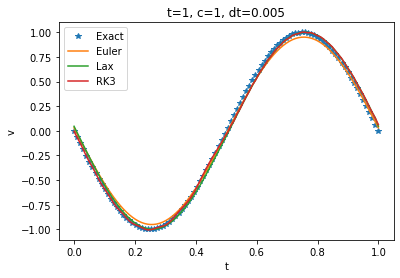

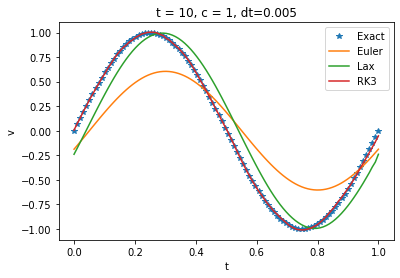

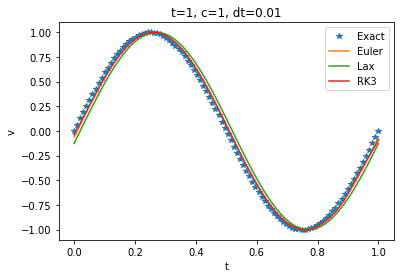

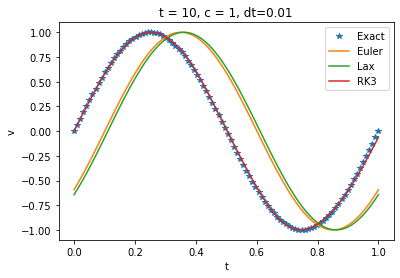

In [10]:
#@title part (i) & (ii)
a = 1.0; tmax = 10; Lx = 1; nx = 99; hx = Lx/(nx+1)
htz = [0.005,0.01]
for ht in htz:
  nt = int(tmax / ht) + 1
  x = np.linspace(0, Lx, nx+1)
  c = a * ht / hx
  u0 = np.sin(2*np.pi*x)
  
  uEuler, uLax, uRK3 = map(np.copy, (u0, u0, u0))
  u2DEuler, u2DLax, u2DRK3, uExact = map(np.zeros, ((nt+1, nx+1), (nt+1, nx+1), (nt+1, nx+1), (nt+1, nx+1)))
  u2DEuler[0], u2DLax[0], u2DRK3[0] = map(np.copy, (u0, u0, u0))
  
  for n in range(nt):
      uEuler = Euler(uEuler, nx, c)
      uLax = LaxWendroff(uLax, nx, c)
      uRK3 = rungeKutta(uRK3, nx, c)
      u2DEuler[n+1] = uEuler
      u2DLax[n] = uLax
      u2DRK3[n] = uRK3
  
  time = np.arange(0, tmax+ht/10, ht)
  for n in range(nt):
      uExact[n] = exactSol(x,time[n],a)
  
  plotTitle = 't=1, c=1'
  if ht == 0.01:
    plotTitle+= ', dt=0.01'
  else:
    plotTitle+= ', dt=0.005'
  label1 = 'Euler'
  label2 = 'Lax'
  label3 = 'RK3'
  label4 = 'Exact'
  ind = 100
  plot(plotTitle, label1, label2, label3, label4, x, u2DEuler[ind], u2DLax[ind], u2DRK3[ind], uExact[ind])
  
  plotTitle = 't = 10, c = 1'
  if ht == 0.01:
    plotTitle+= ', dt=0.01'
  else:
    plotTitle+= ', dt=0.005'
  ind = 1000
  plot(plotTitle, label1, label2, label3, label4, x, u2DEuler[ind], u2DLax[ind], u2DRK3[ind], uExact[ind])

<h1> Problem 4 <h1>

[  3. 155. 140. 127. 115. 103.  92.  82.  71.  61.  50.  40.  43.  49.
  61.  70.  85. 116. 173. 343.]


Text(0.5, 1.0, 'iteration numbers for various omegas')

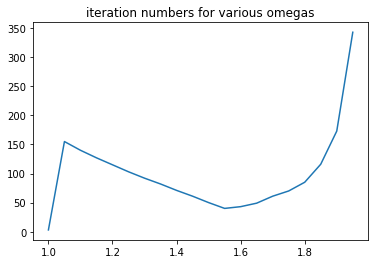

In [12]:
#@title this code generates the plot below however in colab the contour is wrong so I copied the contour from my computer directly
import numpy as np
import matplotlib.pyplot as plt

def contourPlot(X, Y, phi, fileName='Gauss_Seidel', figSize=(14,7)):
    fig, axs = plt.subplots(1,1,figsize=figSize)
    cs = axs.contour(X,Y,phi,linewidths=0)
    cs = axs.imshow(phi.T,extent=[0, 2, 0, 1], origin='lower',
            interpolation='bicubic',cmap='RdBu_r', alpha=1.0,)
    fig.colorbar(cs, ax=axs, orientation='vertical')
    #fig.tight_layout()
    #fig.savefig(fileName, bbox_inches = 'tight', pad_inches = 0.1, dpi = 200)

#% define variables
nx=21; ny=11
dx = 0.1; dy = 0.1

#omega = 1 #Gauss-Seidel (GS)
omegas = np.arange(1,2,0.05)
iterations = np.zeros_like(omegas)
for k in range(omegas.shape[0]):
    omega = omegas[k]
    #print('omega:',omega)
    iteration = 0
#% initial condition
    psi = np.zeros((nx,ny))
    psi_new = np.empty((nx,ny))

    while(True):
        iteration+=1

#% update interior
        for i in range(1,nx-1):
          for j in range(1,ny-1):
            if i<=int(nx/2) or j<=int(ny/2):
              psi_new[i,j]=psi[i,j]+\
                omega/4*(psi_new[i,j-1]+psi[i,j+1]+psi_new[i-1,j]+psi[i+1,j]-4*psi[i,j])

#% update dirichle boundaries
        for i in range(nx):
          psi_new[i,-1]=1 #top left
          psi_new[i,0]=0 #bottom
        for i in range(int(nx/2),nx):
          psi_new[i,int(ny/2)]=1 #top-right (horizontal)
        for j in range(int(ny/2),ny):
          psi_new[int(nx/2),j]=1 #right-top (vertical)
        for j in range(ny):
          psi_new[0,j]=j*dy #left

#% update newmann boundary (right_bottom)
        for j in range(int(ny/2)+1):
          psi_new[i,j] = 1/11*(18*psi_new[i-1,j]-9*psi_new[i-2,j] + 2*psi[i-3,j])

#% check for convergence and break if converged
        max = 0
        for i in range(nx):
            for j in range(ny):
                if i<=int(nx/2)+1 or j<=int(ny/2)+1:
                    if max<np.abs(psi_new[i,j]-psi[i,j]):
                        max = np.abs(psi_new[i,j]-psi[i,j])
                    psi[i,j]=psi_new[i,j]
        if max < 1e-8:
            iterations[k]=iteration
            break

    if(omega == 1):
        x = np.linspace(0, 2, nx)
        y = np.linspace(0, 1, ny)
        X, Y = np.meshgrid(x, y, indexing='ij')
        for i in range(nx):
            for j in range(ny):
                if not(i<=int(nx/2)+1 or j<=int(ny/2)+1):
                    psi[i,j]= float("nan")
        #contourPlot(X, Y, psi)

print(iterations)
plt.show()
fig=plt.figure()
plt.plot(omegas,iterations)
plt.title('iteration numbers for various omegas')

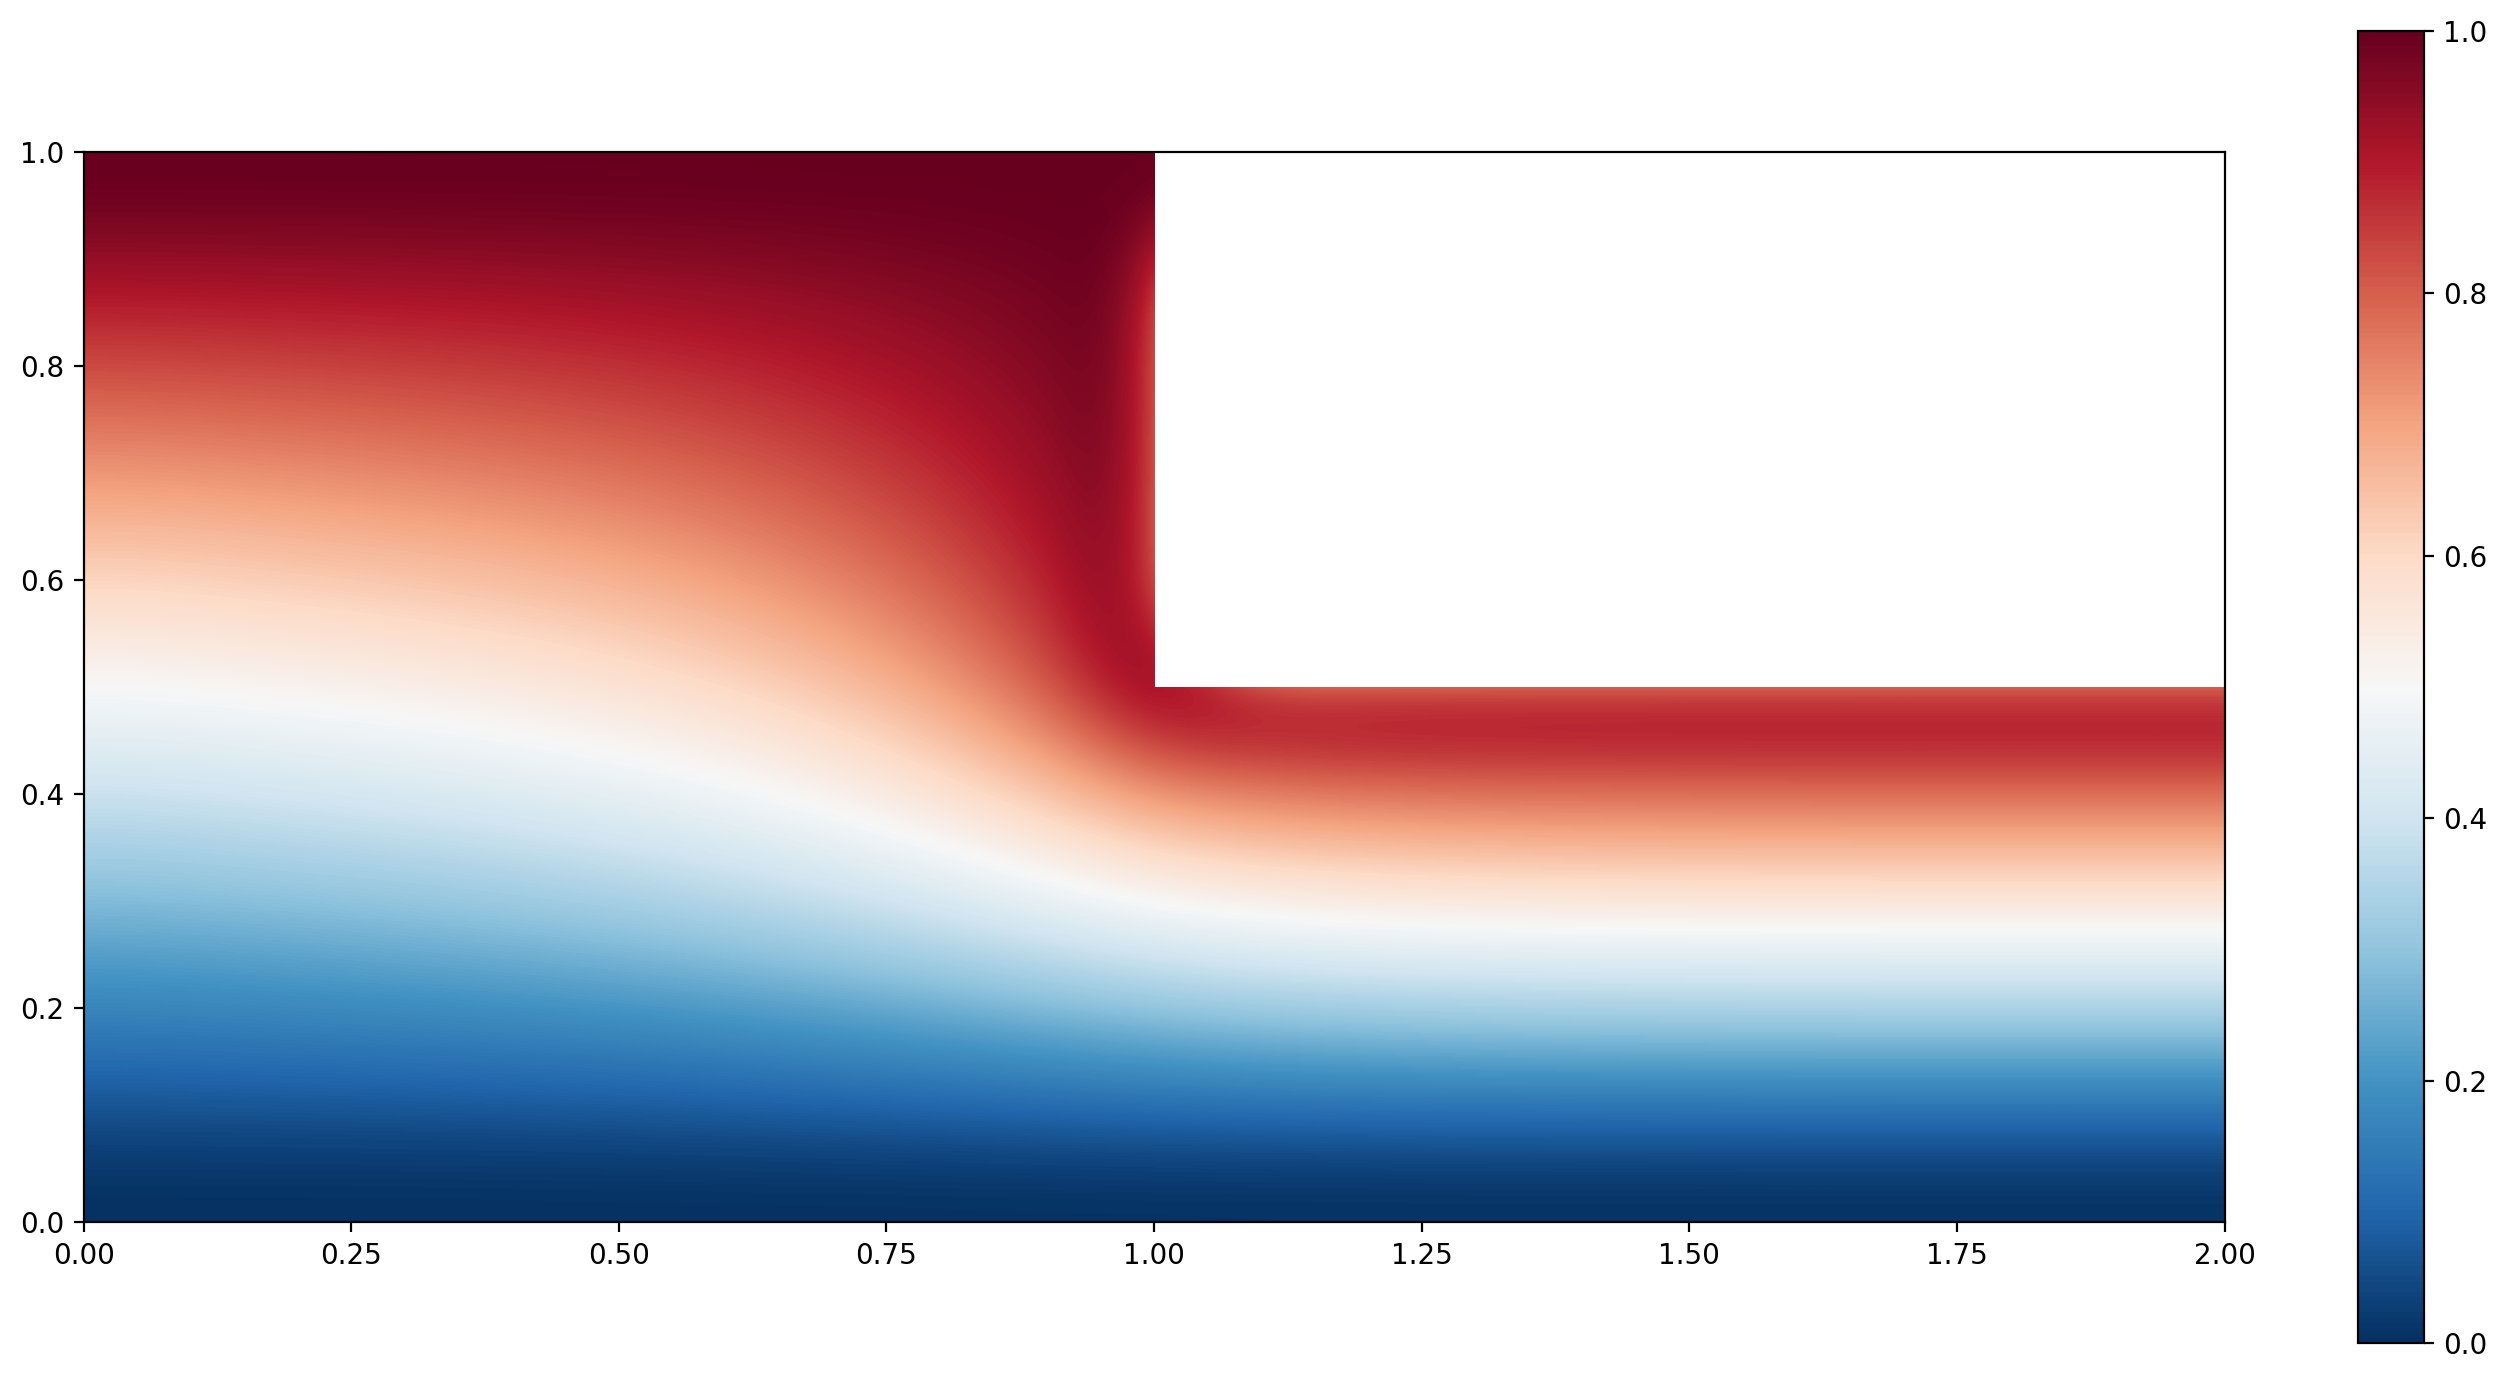

<h1>Problem 5<h1>

In [ ]:
#@title Dr San's code for conjucate gradient and Multigrid from Canvas
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 12 12:37:05 2021

@author: osan
"""
import numpy as np
from scipy.fftpack import dst, idst
import matplotlib.pyplot as plt 


#%%

def fst(nx,ny,dx,dy,f):
    
    data = f[1:-1,1:-1]
        
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dst.html
    data = dst(data, axis = 1, type = 1)
    data = dst(data, axis = 0, type = 1)
    
    m = np.linspace(1,nx-1,nx-1).reshape([-1,1])
    n = np.linspace(1,ny-1,ny-1).reshape([1,-1])
        
    data1 = np.zeros((nx-1,ny-1))

    alpha = (2.0/(dx*dx))*(np.cos(np.pi*m/nx) - 1.0) + (2.0/(dy*dy))*(np.cos(np.pi*n/ny) - 1.0)           
    data1 = data/alpha
    
    data1 = idst(data1, axis = 1, type = 1)
    data1 = idst(data1, axis = 0, type = 1)
    
    u = data1/((2.0*nx)*(2.0*ny))
    
    un = np.zeros((nx+1,ny+1))
    un[1:-1,1:-1] = u
    
    return un

def jacobi(nx,ny,dx,dy,f):
    ii = np.arange(1,nx)
    jj = np.arange(1,ny)
    ii,jj = np.meshgrid(ii,jj,indexing='ij')
    
    den = -2.0/dx**2 - 2.0/dy**2
    omega = 1.0

    un = np.zeros((nx+1,ny+1))
    if ic == 1:
        un[ii,jj] = np.random.randn(nx-1,ny-1)
        
    rt = np.zeros((nx+1,ny+1))
    
    l2_norm_history = []
    l2_norm_n = 1.0
    counter = 0
    
    rt[ii,jj] = f[ii,jj] - (un[ii+1,jj] - 2.0*un[ii,jj] + un[ii-1,jj])/dx**2 - (un[ii,jj+1] - 2.0*un[ii,jj] + un[ii,jj-1])/dy**2
    l2_norm_0 = np.sqrt(np.mean(rt[ii,jj]**2))
    
    while l2_norm_n > TOL:
        if vector:
            rt[ii,jj] = f[ii,jj] - \
                        (un[ii+1,jj] - 2.0*un[ii,jj] + un[ii-1,jj])/dx**2 -\
                        (un[ii,jj+1] - 2.0*un[ii,jj] + un[ii,jj-1])/dy**2
            
            un[ii,jj] = un[ii,jj] + omega*rt[ii,jj]/den
            
        else:
            for j in range(1,nx):
                for i in range(1,ny):
                    rt[i,j] = f[i,j] - \
                             (un[i+1,j] - 2.0*un[i,j] + un[i-1,j])/dx**2 - \
                             (un[i,j+1] - 2.0*un[i,j] + un[i,j-1])/dy**2
            
            for j in range(1,nx):
                for i in range(1,ny):
                    un[i,j] = un[i,j] + omega*rt[i,j]/den
        
        rt[ii,jj] = f[ii,jj] - (un[ii+1,jj] - 2.0*un[ii,jj] + un[ii-1,jj])/dx**2 - (un[ii,jj+1] - 2.0*un[ii,jj] + un[ii,jj-1])/dy**2
        l2_norm = np.sqrt(np.mean(rt[ii,jj]**2))
        
        l2_norm_n = l2_norm/l2_norm_0
        print('%0.2i %0.5e %0.5e' % (counter, l2_norm, l2_norm_n))
        l2_norm_history.append([counter,l2_norm, l2_norm_n])
        counter += 1
        
        if counter > MAX_ITER:
            break
    
    #print(f'Number of iterations = {counter}')
    return un, l2_norm_history


def gs(nx,ny,dx,dy,f):
    ii = np.arange(1,nx)
    jj = np.arange(1,ny)
    ii,jj = np.meshgrid(ii,jj,indexing='ij')
    
    den = -2.0/dx**2 - 2.0/dy**2
    omega = 1.0
    
    un = np.zeros((nx+1,ny+1))
    if ic == 1:
        un[ii,jj] = np.random.randn(nx-1,ny-1)

    rt = np.zeros((nx+1,ny+1))

    l2_norm_history = []
    l2_norm_n = 1.0
    counter = 0
    
    rt[ii,jj] = f[ii,jj] - (un[ii+1,jj] - 2.0*un[ii,jj] + un[ii-1,jj])/dx**2 - (un[ii,jj+1] - 2.0*un[ii,jj] + un[ii,jj-1])/dy**2
    l2_norm_0 = np.sqrt(np.mean(rt[ii,jj]**2))

    while l2_norm_n > TOL:
        for j in range(1,nx):
            for i in range(1,ny):
                rt[i,j] = f[i,j] - \
                         (un[i+1,j] - 2.0*un[i,j] + un[i-1,j])/dx**2 - \
                         (un[i,j+1] - 2.0*un[i,j] + un[i,j-1])/dy**2
  
                un[i,j] = un[i,j] + omega*rt[i,j]/den
        
        rt[ii,jj] = f[ii,jj] - (un[ii+1,jj] - 2.0*un[ii,jj] + un[ii-1,jj])/dx**2 - (un[ii,jj+1] - 2.0*un[ii,jj] + un[ii,jj-1])/dy**2
        l2_norm = np.sqrt(np.mean(rt[ii,jj]**2))
    
        l2_norm_n = l2_norm/l2_norm_0
        print('%0.2i %0.5e %0.5e' % (counter, l2_norm, l2_norm_n))
        l2_norm_history.append([counter,l2_norm, l2_norm_n])
        counter += 1

        if counter > MAX_ITER:
            break
    
    print(f'Number of iterations = {counter}')
    return un, l2_norm_history

def cg(nx,ny,dx,dy,f,ic):
    TOL = 1e-6
    tiny = 1e-12
    MAX_ITER = 1e3
    ii = np.arange(1,nx)
    jj = np.arange(1,ny)
    ii,jj = np.meshgrid(ii,jj,indexing='ij')
    
    un = np.zeros((nx+1,ny+1))
    if ic == 1:
        un[ii,jj] = np.random.randn(nx-1,ny-1)

    rt = np.zeros((nx+1,ny+1))
    d = np.zeros((nx+1,ny+1))
    
    l2_norm_history = []
    l2_norm_n = 1.0
    counter = 0
    
    rt[ii,jj] = f[ii,jj] - (un[ii+1,jj] - 2.0*un[ii,jj] + un[ii-1,jj])/dx**2 - (un[ii,jj+1] - 2.0*un[ii,jj] + un[ii,jj-1])/dy**2
    l2_norm_0 = np.sqrt(np.mean(rt[ii,jj]**2))
    
    p = np.copy(rt)
     
    while l2_norm_n > TOL:
        d[ii,jj] = (p[ii+1,jj] - 2.0*p[ii,jj] + p[ii-1,jj])/dx**2 + \
            (p[ii,jj+1] - 2.0*p[ii,jj] + p[ii,jj-1])/dy**2
        
        aa = np.sum(rt[ii,jj]**2)
        bb = np.sum(d[ii,jj]*p[ii,jj])
        
        cc = aa/(bb + tiny)
        
        un[ii,jj] = un[ii,jj] + cc*p[ii,jj]
        
        rt[ii,jj] = rt[ii,jj] - cc*d[ii,jj]
        
        ee = np.sum(rt[ii,jj]**2)  
        
        cc = ee/(aa + tiny)
        
        p[ii,jj] = rt[ii,jj] + cc*p[ii,jj]
        
        l2_norm = np.sqrt(np.mean(rt[ii,jj]**2))
    
        l2_norm_n = l2_norm/l2_norm_0
        #print('%0.2i %0.5e %0.5e' % (counter, l2_norm, l2_norm_n))
        l2_norm_history.append([counter,l2_norm, l2_norm_n])
        counter += 1
        
        if counter > MAX_ITER:
            break
        
    print(f'Number of iterations for CG = {counter}')
    return un, l2_norm_history

#%%
def compute_residual(nx, ny, dx, dy, f, u_n):
    r = np.zeros((nx+1, ny+1))
    d2udx2 = np.zeros((nx+1, ny+1))
    d2udy2 = np.zeros((nx+1, ny+1))
    ii = np.arange(1,nx)
    jj = np.arange(1,ny)
    i,j = np.meshgrid(ii,jj,indexing='ij')
    
    d2udx2[i,j] = (u_n[i+1,j] - 2*u_n[i,j] + u_n[i-1,j])/(dx**2)
    d2udy2[i,j] = (u_n[i,j+1] - 2*u_n[i,j] + u_n[i,j-1])/(dy**2)
    r[i,j] = f[i,j]  - d2udx2[i,j] - d2udy2[i,j]
    
    del d2udx2, d2udy2
    
    return r
    
def restriction(nxf, nyf, nxc, nyc, r):
    ec = np.zeros((nxc+1, nyc+1))
    center = np.zeros((nxc+1, nyc+1))
    grid = np.zeros((nxc+1, nyc+1))
    corner = np.zeros((nxc+1, nyc+1))
    
    ii = np.arange(1,nxc)
    jj = np.arange(1,nyc)
    i,j = np.meshgrid(ii,jj,indexing='ij')
    
    # grid index for fine grid for the same coarse point
    center[i,j] = 4.0*r[2*i, 2*j]
    
    # E, W, N, S with respect to coarse grid point in fine grid
    grid[i,j] = 2.0*(r[2*i, 2*j+1] + r[2*i, 2*j-1] +
                r[2*i+1, 2*j] + r[2*i-1, 2*j])
    
    # NE, NW, SE, SW with respect to coarse grid point in fine grid
    corner[i,j] = 1.0*(r[2*i+1, 2*j+1] + r[2*i+1, 2*j-1] +
                  r[2*i-1, 2*j+1] + r[2*i-1, 2*j-1])
    
    # restriction using trapezoidal rule
    ec[i,j] = (center[i,j] + grid[i,j] + corner[i,j])/16.0
    
    del center, grid, corner
    
    i = np.arange(0,nxc+1)
    ec[i,0] = r[2*i, 0]
    ec[i,nyc] = r[2*i, nyf]
    
    j = np.arange(0,nyc+1)
    ec[0,j] = r[0, 2*j]
    ec[nxc,j] = r[nxf, 2*j]
    
    return ec

def prolongation(nxc, nyc, nxf, nyf, unc):
    ef = np.zeros((nxf+1, nyf+1))
    ii = np.arange(0,nxc)
    jj = np.arange(0,nyc)
    i,j = np.meshgrid(ii,jj,indexing='ij')
    
    ef[2*i, 2*j] = unc[i,j]
    # east neighnour on fine grid corresponding to coarse grid point
    ef[2*i, 2*j+1] = 0.5*(unc[i,j] + unc[i,j+1])
    # north neighbout on fine grid corresponding to coarse grid point
    ef[2*i+1, 2*j] = 0.5*(unc[i,j] + unc[i+1,j])
    # NE neighbour on fine grid corresponding to coarse grid point
    ef[2*i+1, 2*j+1] = 0.25*(unc[i,j] + unc[i,j+1] + unc[i+1,j] + unc[i+1,j+1])
    
    i = np.arange(0,nxc+1)
    ef[2*i,nyf] = unc[i,nyc]
    
    j = np.arange(0,nyc+1)
    ef[nxf,2*j] = unc[nxc,j]
    
    return ef

def gauss_seidel_mg(nx, ny, dx, dy, f, un, V, solver=1):
    rt = np.zeros((nx+1,ny+1))
    den = -2.0/dx**2 - 2.0/dy**2
    omega = 1.0
    unr = np.copy(un)
    
    if solver == 1:
        for k in range(V):
            for j in range(1,nx):
                for i in range(1,ny):
                    rt[i,j] = f[i,j] - \
                    (unr[i+1,j] - 2.0*unr[i,j] + unr[i-1,j])/dx**2 - \
                    (unr[i,j+1] - 2.0*unr[i,j] + unr[i,j-1])/dy**2
      
                    unr[i,j] = unr[i,j] + omega*rt[i,j]/den
                    
    elif solver == 2:
        ii = np.arange(1,nx)
        jj = np.arange(1,ny)
        i,j = np.meshgrid(ii,jj,indexing='ij')
        
        for k in range(V):
            rt[i,j] = f[i,j] - \
                      (unr[i+1,j] - 2.0*unr[i,j] + unr[i-1,j])/dx**2 - \
                      (unr[i,j+1] - 2.0*unr[i,j] + unr[i,j-1])/dy**2
                      
            unr[i,j] = unr[i,j] + omega*rt[i,j]/den
    
    return unr


def mg_n_solver(f, dx, dy, nx, ny, n_level=4, iprint=False):
    
    tiny = 1e-12
    max_iterations = 500
    v1 = 2
    v2 = 2
    v3 = 2
    tolerance = 1e-6
    solver = 1

    un = np.zeros((nx+1,ny+1))    
    u_mg = []
    f_mg = []    
    
    u_mg.append(un)
    f_mg.append(f)
    
    r = compute_residual(nx, ny, dx, dy, f_mg[0], u_mg[0])
    
    rms = np.linalg.norm(r)/np.sqrt((nx-1)*(ny-1))
    init_rms = np.copy(rms)
    
    if iprint:
        print('%0.2i %0.5e %0.5e' % (0, rms, rms/init_rms))
    
    if nx < 2**n_level:
        print("Number of levels exceeds the possible number.\n")
    
    lnx = np.zeros(n_level, dtype='int')
    lny = np.zeros(n_level, dtype='int')
    ldx = np.zeros(n_level)
    ldy = np.zeros(n_level)
    
    
    # initialize the mesh details at fine level
    lnx[0] = nx
    lny[0] = ny
    ldx[0] = dx
    ldy[0] = dy
    
    for i in range(1,n_level):
        lnx[i] = int(lnx[i-1]/2)
        lny[i] = int(lny[i-1]/2)
        ldx[i] = ldx[i-1]*2
        ldy[i] = ldy[i-1]*2
        
        fc = np.zeros((lnx[i]+1, lny[i]+1))
        unc = np.zeros((lnx[i]+1, lny[i]+1))
        
        u_mg.append(unc)
        f_mg.append(fc)
    
    # allocate matrix for storage at fine level
    # residual at fine level is already defined at global level
    prol_fine = np.zeros((lnx[1]+1, lny[1]+1))    
    
    # temporaty residual which is restricted to coarse mesh error
    # the size keeps on changing
    temp_residual = np.zeros((lnx[1]+1, lny[1]+1))    
        
    
    l2_norm_history = []
    
    # start main iteration loop
    for iteration_count in range(max_iterations):  
        if(iteration_count==max_iterations-1):
          print('wow, max_iter and not solved yet')
        k = 0
        u_mg[k][:,:] = gauss_seidel_mg(lnx[k], lny[k], ldx[k], ldy[k], f_mg[k], u_mg[k], v1, solver=solver)
        
        r = compute_residual(lnx[k], lny[k], ldx[k], ldy[k], f_mg[k], u_mg[k])
        
        rms = np.linalg.norm(r)/np.sqrt((nx-1)*(ny-1))
        
        l2_norm_history.append([iteration_count+1, rms, rms/init_rms])
        
        if iprint:
            print('%0.2i %0.5e %0.5e' % (iteration_count+1, rms, rms/init_rms))
        
        if rms/init_rms <= tolerance:
            print(f'Number of iterations for MG2 = {iteration_count}')
            break
        
        for k in range(1,n_level):
            temp_residual = compute_residual(lnx[k-1], lny[k-1], ldx[k-1], ldy[k-1], 
                                                 f_mg[k-1], u_mg[k-1])
                
            f_mg[k] = restriction(lnx[k-1], lny[k-1], lnx[k], lny[k], temp_residual)
            
            # solution at kth level to zero
            u_mg[k][:,:] = 0.0
            
            if k < n_level-1:
                u_mg[k][:,:] = gauss_seidel_mg(lnx[k], lny[k], ldx[k], ldy[k], f_mg[k], u_mg[k], v1, solver=solver)
            elif k == n_level-1:
                u_mg[k][:,:] = gauss_seidel_mg(lnx[k], lny[k], ldx[k], ldy[k], f_mg[k], u_mg[k], v2, solver=solver)
        
        for k in range(n_level-1,0,-1):
            prol_fine = prolongation(lnx[k], lny[k], lnx[k-1], lny[k-1], u_mg[k])
            
            ii = np.arange(1,lnx[k-1])
            jj = np.arange(1,lny[k-1])
            i,j = np.meshgrid(ii,jj,indexing='ij')
            
            u_mg[k-1][i,j] = u_mg[k-1][i,j] + prol_fine[i,j]
            
            u_mg[k-1][:,:] = gauss_seidel_mg(lnx[k-1], lny[k-1], ldx[k-1], ldy[k-1], f_mg[k-1], u_mg[k-1], v3, solver=solver)
           
            
    return u_mg[0], l2_norm_history

In [ ]:
#@title define Gauss Seidel solver method
def GS(x, y, hx, hy, omega):
    u = np.zeros((len(x), len(y)))
    a = -2.0/(hx*hx) - 2.0/(hy*hy)
    max_itr=500
    mse=1
    for itr in range(max_itr):
        uOld = np.copy(u)
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                u[i,j] = (1 - omega) * uOld[i,j] + omega * (1.0/a)*(func(x[j], y[i]) - (u[i+1][j]+u[i-1][j])/(hx*hx) - (u[i][j+1]+u[i][j-1])/(hy*hy) )
        mse = (np.square(uOld - u)).mean(axis=None)
        if mse < 1e-6:
          print(f'Number of iterations for GS = {itr}')
          break
    return u

In [ ]:
#@title part (i) (ii) (iii) solve just for 32x32,64x64 becouse of colab resources limitation, solving for larger numbers is as easy as changing nx
def exactSol(x, y):
    return ((x**2 - 1.) * (y**2 - 1.))

def func(x, y):
    return (- 2. * (2. - x**2 - y**2))

omega = 1
Lx , Ly = 2, 2

print('\n32x32 case')
nx = 31 
ny = nx
hx = Lx/(nx+1)
hy = Ly/(ny+1)
x = np.linspace(-1, -1+Lx, nx+1)
y = np.linspace(-1, -1+Ly, ny+1)

X, Y = np.meshgrid(x, y, indexing='ij')
uExact = exactSol(X, Y)
RHS = func(X, Y)

uGS = GS(x, y, hx, hy, omega)
mse = (np.square(uExact - uGS)).mean(axis=None)
print('mean square error of GS = ', mse)

uCG, _ = cg(nx,ny,hx,hy,RHS,1)
mse = (np.square(uExact - uCG)).mean(axis=None)
print('mean square error of CG = ', mse)

uMG2, _ = mg_n_solver(RHS, hx, hy, nx, ny, n_level=2)
mse = (np.square(uExact - uMG2)).mean(axis=None)
print('mean square error of MG2 = ', mse)

print('\n64x64 case')
nx = 63 
ny = nx
hx = Lx/(nx+1)
hy = Ly/(ny+1)
x = np.linspace(-1, -1+Lx, nx+1)
y = np.linspace(-1, -1+Ly, ny+1)

X, Y = np.meshgrid(x, y, indexing='ij')
uExact = exactSol(X, Y)
RHS = func(X, Y)

uGS = GS(x, y, hx, hy, omega)
mse = (np.square(uExact - uGS)).mean(axis=None)
print('mean square error of GS = ', mse)

uCG, _ = cg(nx,ny,hx,hy,RHS,1)
mse = (np.square(uExact - uCG)).mean(axis=None)
print('mean square error of CG = ', mse)

uMG2, _ = mg_n_solver(RHS, hx, hy, nx, ny, n_level=2)
mse = (np.square(uExact - uMG2)).mean(axis=None)
print('mean square error of MG2 = ', mse)



32x32 case
Number of iterations for GS = 156
mean square error of GS =  0.016503808462868422
Number of iterations for CG = 72
mean square error of CG =  0.001010413738891933
Number of iterations for MG2 = 113
mean square error of MG2 =  0.0010104484820309787

64x64 case
Number of iterations for GS = 96
mean square error of GS =  0.17267854795393164
Number of iterations for CG = 131
mean square error of CG =  0.0002650181313026526
Number of iterations for MG2 = 462
mean square error of MG2 =  0.00026499295963329907


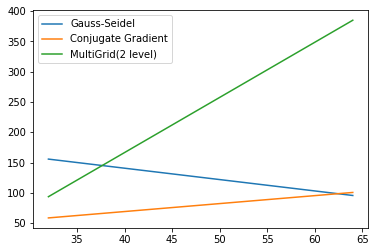

In [ ]:
#@title plot the iteration number for solutions of GS, CG, MG2 (tolerance=1e-6)
msh = [32,64]
GS = [156,96]
CG = [59,101]
MG = [94,385]
plt.plot(msh,GS)
plt.plot(msh,CG)
plt.plot(msh,MG)
plt.legend(['Gauss-Seidel','Conjugate Gradient','MultiGrid(2 level)'])